# **Simple Exponential Smoothing**

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv(r'/content/nestle.csv')

In [ ]:
df.head()

,Date,Open Price,High_Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-Apr-22,18150.00,18572.95,17772.90,18205.80,18130.18344,4590,1770,83217542,950.0,20.70,800.05,55.80
1,20-Apr-22,18100.10,18415.00,18017.15,18313.70,18295.55907,6069,1321,111035748,4677.0,77.06,397.85,213.60
2,19-Apr-22,18470.05,18718.00,17845.60,17943.15,18355.09332,2904,716,53303191,1619.0,55.75,872.40,-526.90
3,18-Apr-22,18294.50,18684.50,18294.50,18549.85,18511.22460,1496,586,27692792,557.0,37.23,390.00,255.35
4,13-Apr-22,18371.20,18549.30,18248.25,18343.90,18388.96783,1150,550,21147313,573.0,49.83,301.05,-27.30


In [ ]:
#Making a copy of the data for High_Price column for train/split
X = df['High_Price']
test = X.iloc[-30:] #Data expected for last 30 days
train = X.iloc[:-30] #Last 30 days to evaluate prediction

In [ ]:
#Function for calculating evaluation metrics to understand how far off our forecasts are against the actuals
#Closer to 0 better the model
#RMSE and MAPE are notable statistics measures used to check the accurcy of forecasting model.

def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') #how close a regression line is to a set of points.
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}') # average magnitude of the errors in a set of predictions.
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}') #square root of the avg of squared diff bet pred and actual obs
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}') #statistical measure of how accurate a forecast is.
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') #proportion of variance in dependent variable by the independent variable

In [ ]:
resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE'])

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 207150337.35625008
MAE is : 14392.391666666666
RMSE is : 14392.718205962698
MAPE is : 344.5085095807939
R2 is : -22037.51366826176

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 80360.3062499731
MAE is : 266.3847531974835
RMSE is : 283.4789344024933
MAPE is : 6.429191032357743
R2 is : -7.549451235650128

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 63827.0780289951
MAE is : 233.2972535524287
RMSE is : 252.64021459180861
MAPE is : 5.637304167159788
R2 is : -5.790497903597922

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 58210.45095820611
MAE is : 220.93207427695333
RMSE is : 241.26842097175938
MAPE is : 5.341366935301581
R2 is : -5.1929506630340025

Fitting for smoothing level= 0.4


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-8-d993ad97386a>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-8-d993ad97386a>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimiz

Evaluation metric results:-
MSE is : 53869.46598431466
MAE is : 210.87910392076728
RMSE is : 232.09796635109635
MAPE is : 5.100768060600029
R2 is : -4.7311176875158525

Fitting for smoothing level= 0.5
Evaluation metric results:-
MSE is : 49713.117135341294
MAE is : 200.78258794390612
RMSE is : 222.96438535187923
MAPE is : 4.8591270036417535
R2 is : -4.288927961507183

Fitting for smoothing level= 0.6
Evaluation metric results:-
MSE is : 45600.88729029774
MAE is : 190.2667017016084
RMSE is : 213.54364258927902
MAPE is : 4.6074491107660975
R2 is : -3.85143201144668

Fitting for smoothing level= 0.7
Evaluation metric results:-
MSE is : 41639.5459156757
MAE is : 179.55521825273362
RMSE is : 204.05770241692838
MAPE is : 4.351089967858876
R2 is : -3.4299889322634707

Fitting for smoothing level= 0.8
Evaluation metric results:-
MSE is : 37960.90699030143
MAE is : 169.00129430395654
RMSE is : 194.83558963983307
MAPE is : 4.098501714258885
R2 is : -3.038622279077499

Fitting for smoothing leve

<ipython-input-8-d993ad97386a>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-8-d993ad97386a>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-8-d993ad97386a>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

Evaluation metric results:-
MSE is : 31732.28125000001
MAE is : 149.77500000000003
RMSE is : 178.13556986183306
MAPE is : 3.638068287620517
R2 is : -2.3759651226179943



<ipython-input-8-d993ad97386a>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)


,smoothing parameter,RMSE
10,1.0,178.135570
9,0.9,186.141853
8,0.8,194.835590
7,0.7,204.057702
6,0.6,213.543643
5,0.5,222.964385
4,0.4,232.097966
3,0.3,241.268421
2,0.2,252.640215
1,0.1,283.478934


In [ ]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 1.0,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 31732.28125000001
MAE is : 149.77500000000003
RMSE is : 178.13556986183306
MAPE is : 3.638068287620517
R2 is : -2.3759651226179943



In [ ]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 31868.757195687547
MAE is : 150.20052904838295
RMSE is : 178.51822650835277
MAPE is : 3.6482788158914157
R2 is : -2.390484659649938



In [ ]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,2523
Model:,SimpleExpSmoothing,SSE,54655890.727
Optimized:,True,AIC,25192.026
Trend:,None,BIC,25203.693
Seasonal:,None,AICC,25192.042
Seasonal Periods:,None,Date:,"Mon, 30 Oct 2023"
Box-Cox:,False,Time:,05:51:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,18572.950,l.0,False


In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['High_Price_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229, 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['High_Price_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229, 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

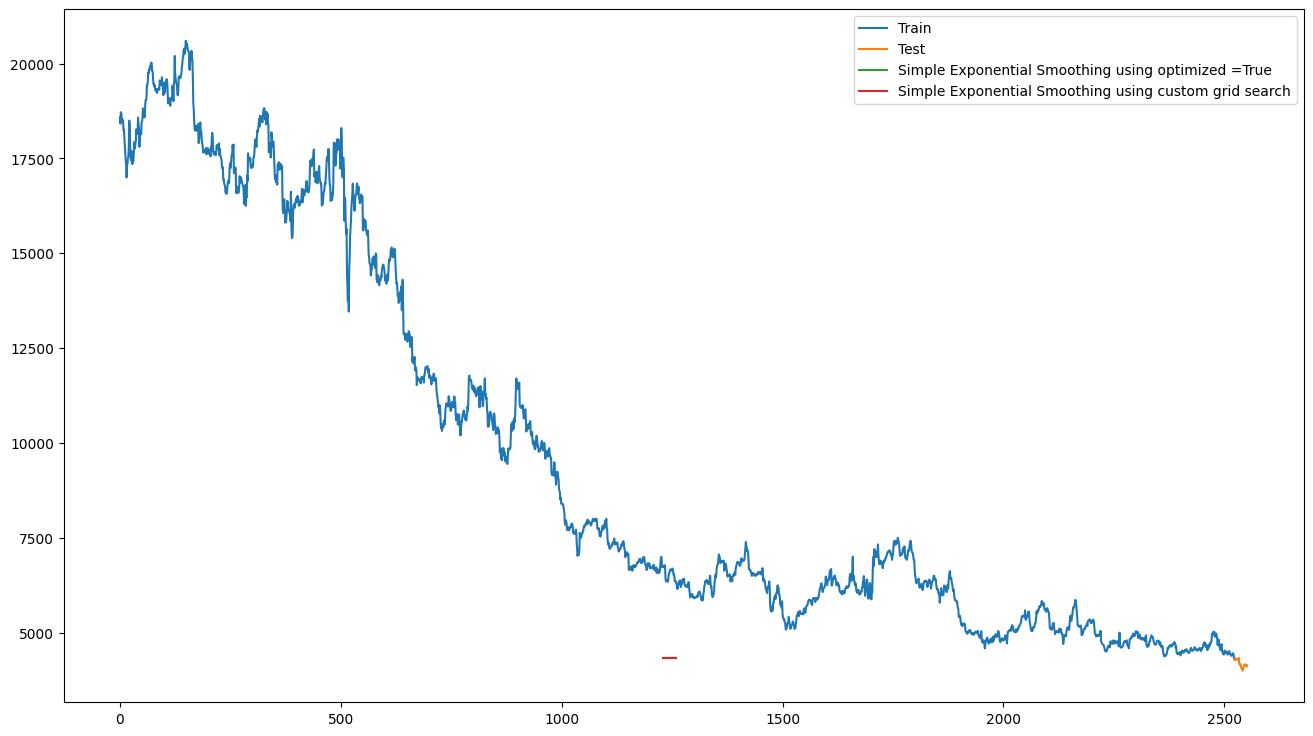

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()